In [27]:
from viewser.operations import fetch
from viewser import Queryset, Column

#some extra functions for some of the later demonstration
import pandas as pd
import numpy as np
import subprocess

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


In [112]:
df = Queryset("month_to_annual", "country_month").fetch()

 .    

In [119]:
df.loc[df.index.get_level_values('country_id') == 185]

,,wdi_sh_dyn_mort_fe,wdi_ny_gdp_mktp_kd,wdi_sp_pop_totl,ged_sb_tlag1,ged_sb_tlag2,ged_sb_tlag3,ged_sb_tlag4,ged_sb_tlag5,ged_sb_tlag6,ged_sb_tlag7,...,ged_sb_tlag27,ged_sb_tlag28,ged_sb_tlag29,ged_sb_tlag30,ged_sb_tlag31,ged_sb_tlag32,ged_sb_tlag33,ged_sb_tlag34,ged_sb_tlag35,ged_sb_tlag36
month_id,country_id,,,,,,,,,,,,,,,,,,,,,
1,185,2.646175,28.251928,18.175912,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,185,2.646175,28.251928,18.175912,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,185,2.646175,28.251928,18.175912,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,185,2.646175,28.251928,18.175912,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,185,2.646175,28.251928,18.175912,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,185,2.174752,28.430870,18.181805,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,185,2.174752,28.430870,18.181805,0.693147,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,185,2.174752,28.430870,18.181805,0.000000,0.693147,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df['country_id'] = df.index.get_level_values('country_id')


In [91]:
df = df.query('month_id > 240 & month_id < 505 & month_id%12 == 0 & country_id<185')

In [92]:
y = df['wdi_sh_dyn_mort_fe']
X = df.drop(columns=['wdi_sh_dyn_mort_fe'])  # Remove the target column from the features

# Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)
#X = X.fillna(X.mean())

# Create the OLS model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Get the summary of the OLS model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     wdi_sh_dyn_mort_fe   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     29.20
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          8.20e-184
Time:                        13:27:53   Log-Likelihood:                -5009.1
No. Observations:                3727   AIC:                         1.010e+04
Df Residuals:                    3687   BIC:                         1.035e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.7116      0

In [93]:
predictions = results.predict(X)

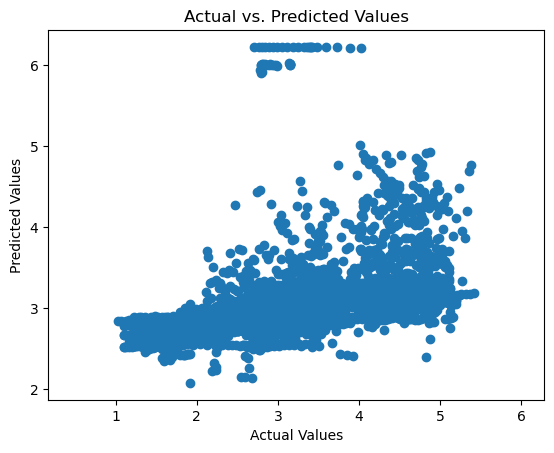

In [99]:
plt.scatter(y, predictions)
plt.axis('equal')


plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [34]:
y

month_id  country_id
252       1             3.732896
          2             3.349904
          3             3.277145
          4             2.990720
          5             3.005683
                          ...   
504       242           3.793239
          243           2.844909
          244           3.616309
          245           3.927896
          246           4.552824
Name: wdi_sh_dyn_mort_fe, Length: 4175, dtype: float64

In [35]:
y[y==0]

month_id  country_id
252       198           0.0
          227           0.0
264       198           0.0
          227           0.0
276       198           0.0
          227           0.0
288       198           0.0
          227           0.0
300       198           0.0
          227           0.0
312       198           0.0
          227           0.0
324       198           0.0
336       198           0.0
348       198           0.0
          232           0.0
360       198           0.0
          232           0.0
372       198           0.0
          232           0.0
384       198           0.0
          232           0.0
396       198           0.0
          232           0.0
408       198           0.0
          232           0.0
420       198           0.0
          232           0.0
432       198           0.0
          232           0.0
444       198           0.0
          232           0.0
456       198           0.0
          232           0.0
468       198           0.0

In [ ]:
plt.scatter(y, predictions)
plt.gca().set_aspect('equal')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [36]:
y.iloc[1]

3.349904087274605

In [108]:
specific_country_data = y.loc[y.index.get_level_values('country_id') == 245
                              ]


In [109]:
specific_country_data

Series([], Name: wdi_sh_dyn_mort_fe, dtype: float64)